# **Pollair**
*Sistemas de predicción de agentes contaminantes en el aire en Colombia-Medellín.*

Utilizando IA se logrará predecir la calidad del aire y el comportamiento de los agentes contaminantes por medio de las muestras, esto nos ayuda a tomar las medidas necesarias y proceder a dar alertas de movilidad cuando tengan un valor elevado en estos parámetros.

En este proyecto no enfocaremos en el país de Colombia, exactamente en la ciudad de Medellín donde se estudiarán el siguiente parámetro o componente contaminante en el aire como lo es Pm2.5.








# colocar imagen


In [123]:
#@title Librerias / Drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [124]:
#@title Cargar Dataset.
#Fecha de Dataset 29-04-2021 a 31-01-2022
data = pd.read_csv('/content/drive/MyDrive/proyecto artificial/data_21429_22131.csv')
data.shape

(90345, 11)

In [119]:
data

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude
0,10805,"MED-ALTA - Medellín, Altavista - I.E. Pedro Oc...",Medellin,CO,2022-01-31T05:00:00+00:00,2022-01-31T04:00:00-01:00,pm25,11.881200,µg/m³,6.221894,-75.610603
1,10683,SUR-TRAF - Estación Tráfico Sur,Medellin,CO,2022-01-31T05:00:00+00:00,2022-01-31T04:00:00-01:00,no2,0.015943,ppm,6.152313,-75.627487
2,10793,"MED-BEME - Medellin, Belén - I.E Pedro Justo B...",Medellin,CO,2022-01-31T05:00:00+00:00,2022-01-31T04:00:00-01:00,pm25,14.545400,µg/m³,6.237234,-75.610466
3,7061,"MED-TESO - Medellín, El Poblado - I.E INEM sed...",Medellin,CO,2022-01-31T05:00:00+00:00,2022-01-31T04:00:00-01:00,pm25,12.196700,µg/m³,6.199870,-75.560951
4,10683,SUR-TRAF - Estación Tráfico Sur,Medellin,CO,2022-01-31T05:00:00+00:00,2022-01-31T04:00:00-01:00,pm25,22.000000,µg/m³,6.152313,-75.627487
...,...,...,...,...,...,...,...,...,...,...,...
90340,10503,ITA-CJUS - Itagüí - Casa de Justicia Itagüí,Medellin,CO,2021-04-29T02:00:00+00:00,2021-04-29T01:00:00-01:00,no2,0.003453,ppm,6.185667,-75.597206
90341,10805,"MED-ALTA - Medellín, Altavista - I.E. Pedro Oc...",Medellin,CO,2021-04-29T02:00:00+00:00,2021-04-29T01:00:00-01:00,pm25,-9999.000000,µg/m³,6.221894,-75.610603
90342,10493,GIR-SOSN - _OFF-Girardota - S.O.S Aburrá Norte,Medellin,CO,2021-04-29T02:00:00+00:00,2021-04-29T01:00:00-01:00,no2,-9999.000000,ppm,6.378433,-75.451141
90343,10702,"MED-LAYE - Medellín, El Poblado - Tanques La Y...",Medellin,CO,2021-04-29T02:00:00+00:00,2021-04-29T01:00:00-01:00,pm25,12.000000,µg/m³,6.182542,-75.550636


In [125]:
#@title Dataset con parámetro PM25
data_pm25 = data[data["parameter"].str.contains('pm25')]
data_pm25.shape

(54677, 11)

In [126]:
data_pm25

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude
0,10805,"MED-ALTA - Medellín, Altavista - I.E. Pedro Oc...",Medellin,CO,2022-01-31T05:00:00+00:00,2022-01-31T04:00:00-01:00,pm25,11.88120,µg/m³,6.221894,-75.610603
2,10793,"MED-BEME - Medellin, Belén - I.E Pedro Justo B...",Medellin,CO,2022-01-31T05:00:00+00:00,2022-01-31T04:00:00-01:00,pm25,14.54540,µg/m³,6.237234,-75.610466
3,7061,"MED-TESO - Medellín, El Poblado - I.E INEM sed...",Medellin,CO,2022-01-31T05:00:00+00:00,2022-01-31T04:00:00-01:00,pm25,12.19670,µg/m³,6.199870,-75.560951
4,10683,SUR-TRAF - Estación Tráfico Sur,Medellin,CO,2022-01-31T05:00:00+00:00,2022-01-31T04:00:00-01:00,pm25,22.00000,µg/m³,6.152313,-75.627487
5,10682,"MED-SCRI - Medellín, San Cristobal - Parque Bi...",Medellin,CO,2022-01-31T05:00:00+00:00,2022-01-31T04:00:00-01:00,pm25,9.84435,µg/m³,6.277850,-75.636429
...,...,...,...,...,...,...,...,...,...,...,...
90337,10683,SUR-TRAF - Estación Tráfico Sur,Medellin,CO,2021-04-29T02:00:00+00:00,2021-04-29T01:00:00-01:00,pm25,6.00000,µg/m³,6.152313,-75.627487
90338,10503,ITA-CJUS - Itagüí - Casa de Justicia Itagüí,Medellin,CO,2021-04-29T02:00:00+00:00,2021-04-29T01:00:00-01:00,pm25,22.00000,µg/m³,6.185667,-75.597206
90341,10805,"MED-ALTA - Medellín, Altavista - I.E. Pedro Oc...",Medellin,CO,2021-04-29T02:00:00+00:00,2021-04-29T01:00:00-01:00,pm25,-9999.00000,µg/m³,6.221894,-75.610603
90343,10702,"MED-LAYE - Medellín, El Poblado - Tanques La Y...",Medellin,CO,2021-04-29T02:00:00+00:00,2021-04-29T01:00:00-01:00,pm25,12.00000,µg/m³,6.182542,-75.550636


In [130]:
#@title Verificar unidad de medida Pm25
# Para sacar los datos únicos o todos los diferentes tipos de datos que hay en la columna 'unit'
# sirve para comprobar que todos los del pm25 su unidad de medida es microgramo por metro cúbico
print(data_pm25['unit'].unique())

['µg/m³']


In [145]:
#@title Detalle de locaciones y cantidad de muestras por locación. 
id_ubicaciones = data_pm25['locationId'].unique()
print("{:^15s}|{:^25s}".format("Location ID", "Cantidad de muestras"))
c_ubicaciones = []
for id_ubicacion in id_ubicaciones:
  print("{:^15d}|{:^25d}".format(id_ubicacion, len(data_pm25[data_pm25['locationId'] == id_ubicacion])))
  c_ubicaciones.append([id_ubicacion, len(data_pm25[data_pm25['locationId'] == id_ubicacion])])
pareja_maxima = max(c_ubicaciones, key=lambda x:x[1])
print("-----------------------")
print("La ubicación con mayor cantidad de muestras es la del id {:d} con {:d} muestras".format(pareja_maxima[0], pareja_maxima[1]))

  Location ID  |  Cantidad de muestras   
     10805     |          4433           
     10793     |          4437           
     7061      |          4455           
     10683     |          4456           
     10682     |          4392           
     10797     |          4429           
     10640     |          4417           
     10813     |          4380           
     7063      |          4458           
     10702     |          4454           
     10503     |          4428           
     10493     |          2969           
     10641     |          2969           
-----------------------
La ubicación con mayor cantidad de muestras es la del id 7063 con 4458 muestras


In [146]:
#@title Dataset con localidad 7063
data_pm25_7063 = data_pm25[data_pm25["locationId"] == pareja_maxima[0]]
data_pm25_7063.shape

(4458, 11)

In [ ]:
data_pm25_7063

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude
12,7063,"MED-ARAN - Medellín, Aranjuez - I.E Ciro Mendia",Medellin,CO,2022-01-31T05:00:00+00:00,2022-01-31T04:00:00-01:00,pm25,18.67390,µg/m³,6.290481,-75.555519
29,7063,"MED-ARAN - Medellín, Aranjuez - I.E Ciro Mendia",Medellin,CO,2022-01-31T04:00:00+00:00,2022-01-31T03:00:00-01:00,pm25,22.24550,µg/m³,6.290481,-75.555519
47,7063,"MED-ARAN - Medellín, Aranjuez - I.E Ciro Mendia",Medellin,CO,2022-01-31T03:00:00+00:00,2022-01-31T02:00:00-01:00,pm25,21.15240,µg/m³,6.290481,-75.555519
52,7063,"MED-ARAN - Medellín, Aranjuez - I.E Ciro Mendia",Medellin,CO,2022-01-31T02:00:00+00:00,2022-01-31T01:00:00-01:00,pm25,17.68530,µg/m³,6.290481,-75.555519
64,7063,"MED-ARAN - Medellín, Aranjuez - I.E Ciro Mendia",Medellin,CO,2022-01-31T01:00:00+00:00,2022-01-31T00:00:00-01:00,pm25,16.57120,µg/m³,6.290481,-75.555519
...,...,...,...,...,...,...,...,...,...,...,...
90237,7063,"MED-ARAN - Medellín, Aranjuez - I.E Ciro Mendia",Medellin,CO,2021-04-29T06:00:00+00:00,2021-04-29T05:00:00-01:00,pm25,10.49070,µg/m³,6.290481,-75.555519
90256,7063,"MED-ARAN - Medellín, Aranjuez - I.E Ciro Mendia",Medellin,CO,2021-04-29T05:00:00+00:00,2021-04-29T04:00:00-01:00,pm25,9.32375,µg/m³,6.290481,-75.555519
90296,7063,"MED-ARAN - Medellín, Aranjuez - I.E Ciro Mendia",Medellin,CO,2021-04-29T04:00:00+00:00,2021-04-29T03:00:00-01:00,pm25,11.66320,µg/m³,6.290481,-75.555519
90311,7063,"MED-ARAN - Medellín, Aranjuez - I.E Ciro Mendia",Medellin,CO,2021-04-29T03:00:00+00:00,2021-04-29T02:00:00-01:00,pm25,17.54740,µg/m³,6.290481,-75.555519


In [147]:
#@title cantidad de valores en -9999.0
data_pm25_7063_NULO=data_pm25_7063[data_pm25_7063['value']==-9999.0]
data_pm25_7063_NULO.shape

(236, 11)

In [148]:
#@title Eliminando datos con valores -9999.0
data_pm25_7063 = data_pm25_7063.drop(data_pm25_7063[data_pm25_7063['value']<0].index)

In [149]:
#@title cantidad de valores en -9999.0
data_pm25_7063_NULO=data_pm25_7063[data_pm25_7063['value']==-9999.0]
data_pm25_7063_NULO.shape

(0, 11)

In [150]:
#@title Extraer columna value 
# Sacar los datos del valor, que serán nuestros datos brutos
datos_brutos = data_pm25_7063['value'].tolist()

In [151]:
#Primeros 10 datos de value
datos_brutos[0:10]

[18.6739,
 22.2455,
 21.1524,
 17.6853,
 16.5712,
 22.6303,
 13.2386,
 7.28864,
 7.31396,
 14.6289]

In [152]:
#Ultimo 10 datos de value
datos_brutos[-10:]

[18.6776,
 15.1712,
 11.6709,
 14.0078,
 15.1674,
 10.4907,
 9.32375,
 11.6632,
 17.5474,
 24.6025]

In [153]:
#@title Ventaneo
data_x = []
data_y = []
ancho = 6

for i in range(0, len(datos_brutos)-ancho):
  t_x = datos_brutos[i:i+6]
  data_x.append(t_x)
  t_y = datos_brutos[i+6]
  data_y.append(t_y)

In [154]:
for i in data_x:
  print(i)

[18.6739, 22.2455, 21.1524, 17.6853, 16.5712, 22.6303]
[22.2455, 21.1524, 17.6853, 16.5712, 22.6303, 13.2386]
[21.1524, 17.6853, 16.5712, 22.6303, 13.2386, 7.28864]
[17.6853, 16.5712, 22.6303, 13.2386, 7.28864, 7.31396]
[16.5712, 22.6303, 13.2386, 7.28864, 7.31396, 14.6289]
[22.6303, 13.2386, 7.28864, 7.31396, 14.6289, 10.9563]
[13.2386, 7.28864, 7.31396, 14.6289, 10.9563, 14.5375]
[7.28864, 7.31396, 14.6289, 10.9563, 14.5375, 14.4477]
[7.31396, 14.6289, 10.9563, 14.5375, 14.4477, 15.5273]
[14.6289, 10.9563, 14.5375, 14.4477, 15.5273, 18.944]
[10.9563, 14.5375, 14.4477, 15.5273, 18.944, 29.3907]
[14.5375, 14.4477, 15.5273, 18.944, 29.3907, 23.304]
[14.4477, 15.5273, 18.944, 29.3907, 23.304, 25.5421]
[15.5273, 18.944, 29.3907, 23.304, 25.5421, 24.3579]
[18.944, 29.3907, 23.304, 25.5421, 24.3579, 18.5822]
[29.3907, 23.304, 25.5421, 24.3579, 18.5822, 18.6012]
[23.304, 25.5421, 24.3579, 18.5822, 18.6012, 18.6289]
[25.5421, 24.3579, 18.5822, 18.6012, 18.6289, 17.4916]
[24.3579, 18.5822, 18.

In [ ]:
data_y

[13.2386,
 7.28864,
 7.31396,
 14.6289,
 10.9563,
 14.5375,
 14.4477,
 15.5273,
 18.944,
 29.3907,
 23.304,
 25.5421,
 24.3579,
 18.5822,
 18.6012,
 18.6289,
 17.4916,
 20.9933,
 22.197,
 22.2638,
 22.3409,
 29.5287,
 22.5194,
 19.0502,
 20.3934,
 12.1007,
 17.0078,
 13.432,
 19.5361,
 26.7641,
 18.1348,
 34.762,
 21.424,
 31.9105,
 37.3286,
 32.5106,
 23.2103,
 25.5667,
 20.9822,
 19.8327,
 17.5381,
 19.9031,
 19.9613,
 23.5615,
 24.783,
 24.9134,
 22.6434,
 21.5725,
 9.64167,
 13.3982,
 12.2012,
 11.0264,
 15.9089,
 13.3998,
 14.5146,
 20.4208,
 22.644,
 34.3349,
 40.8636,
 38.4035,
 32.6131,
 21.0077,
 25.7067,
 21.0691,
 19.9008,
 17.5767,
 21.1395,
 20.0068,
 22.4015,
 27.1863,
 20.1516,
 22.619,
 11.9471,
 10.8135,
 21.75,
 10.8995,
 19.4706,
 15.7529,
 16.8648,
 22.6726,
 24.8323,
 30.5656,
 33.8899,
 36.1595,
 29.1773,
 24.5413,
 25.7749,
 19.9533,
 12.9313,
 17.6466,
 20.0336,
 20.0305,
 21.2756,
 23.6523,
 26.1014,
 21.4264,
 21.574,
 15.6513,
 16.9446,
 15.7301,
 13.2644,
 1

# **Implementación Modelos de Regresión**

**1. Modelo DecisionTreeRegressor**

In [155]:
from pandas.core.frame import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import *

np.random.seed(21)

X = data_x
y = data_y
X_train_DTR, X_test_DTR, y_train_DTR, y_test_DTR = train_test_split(X, y, test_size=0.2, random_state=21)
regressor_DTR = DecisionTreeRegressor()
regressor_DTR.fit(X_train_DTR, y_train_DTR)
y_predict_DTR = list(regressor_DTR.predict(X_test_DTR))
mse_dt = mean_squared_error(y_test_DTR, y_predict_DTR)
print("MSE depth split data  %.3f"% mean_squared_error(y_test_DTR, y_predict_DTR))
print("RMSE depth split data  %.3f"% np.sqrt(mean_squared_error(y_test_DTR, y_predict_DTR)))
print("MAE depth split data  %.3f"% mean_absolute_error(y_test_DTR, y_predict_DTR))

MSE depth split data  63.470
RMSE depth split data  7.967
MAE depth split data  6.100


In [156]:
print(y_test_DTR)
print(y_predict_DTR)

[9.87285, 16.0624, 17.4117, 27.6341, 22.1462, 33.7882, 27.2762, 21.5536, 19.0502, 25.1933, 19.5361, 18.9076, 16.4627, 26.1153, 45.6211, 8.45316, 26.2054, 29.5287, 7.27128, 16.6243, 4.66264, 35.0917, 9.32375, 16.9902, 7.28932, 17.574, 15.7186, 18.879, 22.7637, 24.6107, 24.5247, 29.4406, 18.8078, 11.7243, 22.8777, 4.88083, 10.89, 25.9688, 16.3069, 13.1954, 24.5894, 23.3364, 13.139, 19.2223, 25.9057, 22.3267, 9.88214, 18.4124, 3.66317, 15.8407, 29.1412, 10.8049, 27.0926, 20.0792, 13.1138, 23.4414, 25.8309, 17.1129, 34.3464, 15.4166, 9.34231, 13.3277, 13.0416, 20.2455, 18.6711, 13.1616, 13.2868, 19.826, 6.01956, 15.5948, 12.0184, 4.92197, 5.8641, 19.0731, 18.9978, 7.27864, 6.96858, 16.3361, 17.8735, 11.649, 14.1875, 33.8091, 1.1696, 6.06043, 21.5362, 34.184, 12.2012, 27.1369, 16.6674, 8.59785, 14.6368, 18.9719, 26.3029, 17.6358, 8.34425, 29.3376, 12.9393, 28.0672, 17.9331, 4.88736, 25.8439, 10.6116, 4.68265, 19.0482, 26.3646, 16.4896, 6.9779, 18.8337, 12.2083, 32.6344, 20.2504, 28.0055, 10

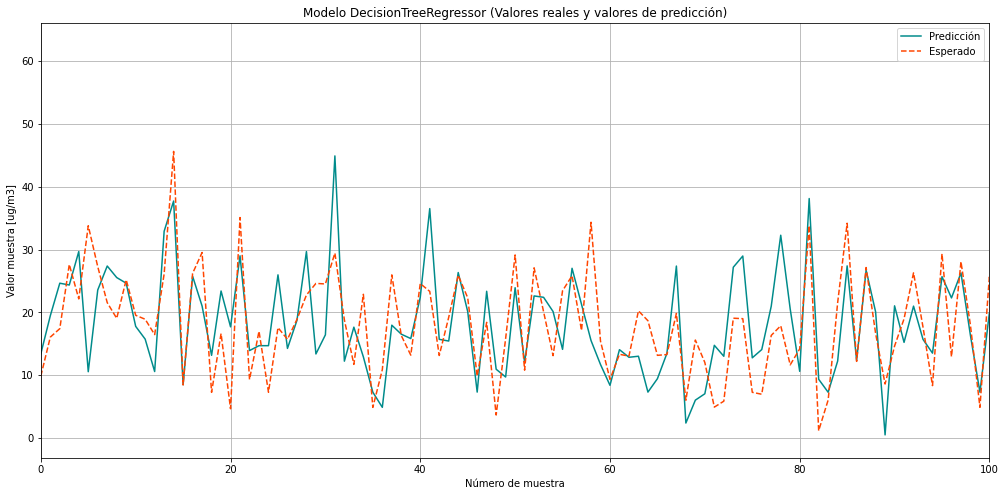

In [157]:
plt.figure(figsize=(17,8))
plt.plot(y_predict_DTR, color = 'darkcyan', label="Predicción")
plt.plot(y_test_DTR, '--', color = 'orangered', label="Esperado")
plt.xlim(0, 100)

plt.title("Modelo DecisionTreeRegressor (Valores reales y valores de predicción)")
plt.xlabel("Número de muestra")
plt.ylabel("Valor muestra [ug/m3]")

plt.legend()
plt.grid()

**2. Modelo RandomForestRegressor**

In [158]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(21)  
X = data_x
y = data_y
X_train_RFR, X_test_RFR, y_train_RFR, y_test_RFR = train_test_split(X, y, test_size=0.2, random_state=21)

regressor_RFR = RandomForestRegressor()
regressor_RFR.fit(X_train_RFR, y_train_RFR)
y_predict_RFR = list(regressor_RFR.predict(X_test_RFR))

mse_rf = mean_squared_error(y_test_RFR, regressor_RFR.predict(X_test_RFR))
print("MSE depth split data  %.3f"% mean_squared_error(y_test_RFR, y_predict_RFR))
print("RMSE depth split data  %.3f"% np.sqrt(mean_squared_error(y_test_RFR, y_predict_RFR)))
print("MAE depth split data  %.3f"% mean_absolute_error(y_test_RFR, y_predict_RFR))

MSE depth split data  32.955
RMSE depth split data  5.741
MAE depth split data  4.413


In [159]:
print(y_test_RFR)
print(y_predict_RFR)

[9.87285, 16.0624, 17.4117, 27.6341, 22.1462, 33.7882, 27.2762, 21.5536, 19.0502, 25.1933, 19.5361, 18.9076, 16.4627, 26.1153, 45.6211, 8.45316, 26.2054, 29.5287, 7.27128, 16.6243, 4.66264, 35.0917, 9.32375, 16.9902, 7.28932, 17.574, 15.7186, 18.879, 22.7637, 24.6107, 24.5247, 29.4406, 18.8078, 11.7243, 22.8777, 4.88083, 10.89, 25.9688, 16.3069, 13.1954, 24.5894, 23.3364, 13.139, 19.2223, 25.9057, 22.3267, 9.88214, 18.4124, 3.66317, 15.8407, 29.1412, 10.8049, 27.0926, 20.0792, 13.1138, 23.4414, 25.8309, 17.1129, 34.3464, 15.4166, 9.34231, 13.3277, 13.0416, 20.2455, 18.6711, 13.1616, 13.2868, 19.826, 6.01956, 15.5948, 12.0184, 4.92197, 5.8641, 19.0731, 18.9978, 7.27864, 6.96858, 16.3361, 17.8735, 11.649, 14.1875, 33.8091, 1.1696, 6.06043, 21.5362, 34.184, 12.2012, 27.1369, 16.6674, 8.59785, 14.6368, 18.9719, 26.3029, 17.6358, 8.34425, 29.3376, 12.9393, 28.0672, 17.9331, 4.88736, 25.8439, 10.6116, 4.68265, 19.0482, 26.3646, 16.4896, 6.9779, 18.8337, 12.2083, 32.6344, 20.2504, 28.0055, 10

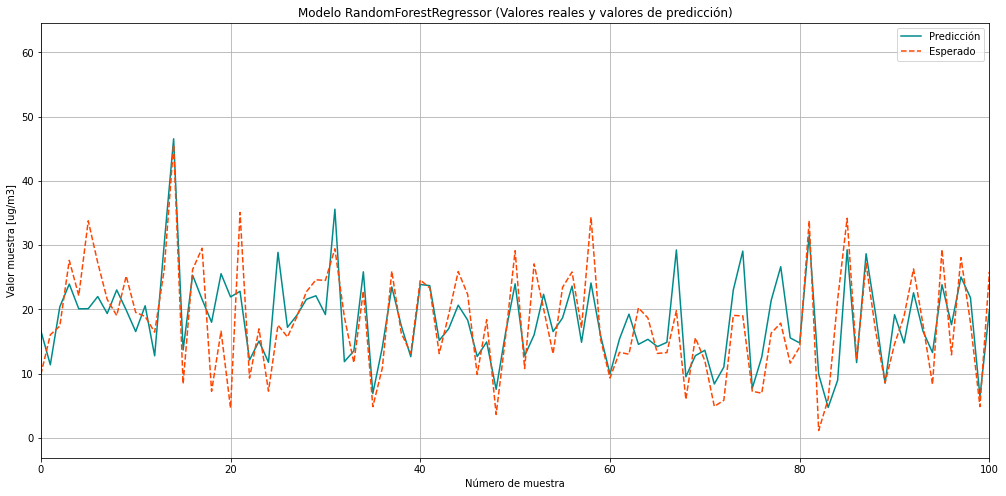

In [160]:
plt.figure(figsize=(17,8))
plt.plot(y_predict_RFR, color = 'darkcyan', label="Predicción")
plt.plot(y_test_RFR, '--', color = 'orangered', label="Esperado")
plt.xlim(0, 100)

plt.title("Modelo RandomForestRegressor (Valores reales y valores de predicción)")
plt.xlabel("Número de muestra")
plt.ylabel("Valor muestra [ug/m3]")

plt.legend()
plt.grid()

**3. Modelo SVR**

In [161]:
#@title SVM (Regressor) 'linear', 'poly', 'rbf'
kernel = "linear" #@param {type:"string"}
from sklearn import preprocessing
from sklearn import utils
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, mean_squared_error
np.random.seed(21)
X = data_x
y = data_y
X_train_SVR, X_test_SVR, y_train_SVR, y_test_SVR = train_test_split(X,y, test_size=0.2, random_state=21)
scores = []
est_SVR = SVR(kernel=kernel)
est_SVR.fit(X_train_SVR, y_train_SVR)
y_predict_SVR = list(est_SVR.predict(X_test_SVR))
mse_SVR = mean_squared_error(y_test_SVR, y_predict_SVR)
scores.append(mse_SVR)

In [ ]:
print("MSE depth split data  %.3f"% mean_squared_error(y_test_SVR, y_predict_SVR))
print("RMSE depth split data  %.3f"% np.sqrt(mean_squared_error(y_test_SVR, y_predict_SVR)))
print("MAE depth split data  %.3f"% mean_absolute_error(y_test_SVR, y_predict_SVR))

MSE depth split data  30.817
RMSE depth split data  5.551
MAE depth split data  4.218


In [162]:
print(y_test_SVR)
print(y_predict_SVR)

[9.87285, 16.0624, 17.4117, 27.6341, 22.1462, 33.7882, 27.2762, 21.5536, 19.0502, 25.1933, 19.5361, 18.9076, 16.4627, 26.1153, 45.6211, 8.45316, 26.2054, 29.5287, 7.27128, 16.6243, 4.66264, 35.0917, 9.32375, 16.9902, 7.28932, 17.574, 15.7186, 18.879, 22.7637, 24.6107, 24.5247, 29.4406, 18.8078, 11.7243, 22.8777, 4.88083, 10.89, 25.9688, 16.3069, 13.1954, 24.5894, 23.3364, 13.139, 19.2223, 25.9057, 22.3267, 9.88214, 18.4124, 3.66317, 15.8407, 29.1412, 10.8049, 27.0926, 20.0792, 13.1138, 23.4414, 25.8309, 17.1129, 34.3464, 15.4166, 9.34231, 13.3277, 13.0416, 20.2455, 18.6711, 13.1616, 13.2868, 19.826, 6.01956, 15.5948, 12.0184, 4.92197, 5.8641, 19.0731, 18.9978, 7.27864, 6.96858, 16.3361, 17.8735, 11.649, 14.1875, 33.8091, 1.1696, 6.06043, 21.5362, 34.184, 12.2012, 27.1369, 16.6674, 8.59785, 14.6368, 18.9719, 26.3029, 17.6358, 8.34425, 29.3376, 12.9393, 28.0672, 17.9331, 4.88736, 25.8439, 10.6116, 4.68265, 19.0482, 26.3646, 16.4896, 6.9779, 18.8337, 12.2083, 32.6344, 20.2504, 28.0055, 10

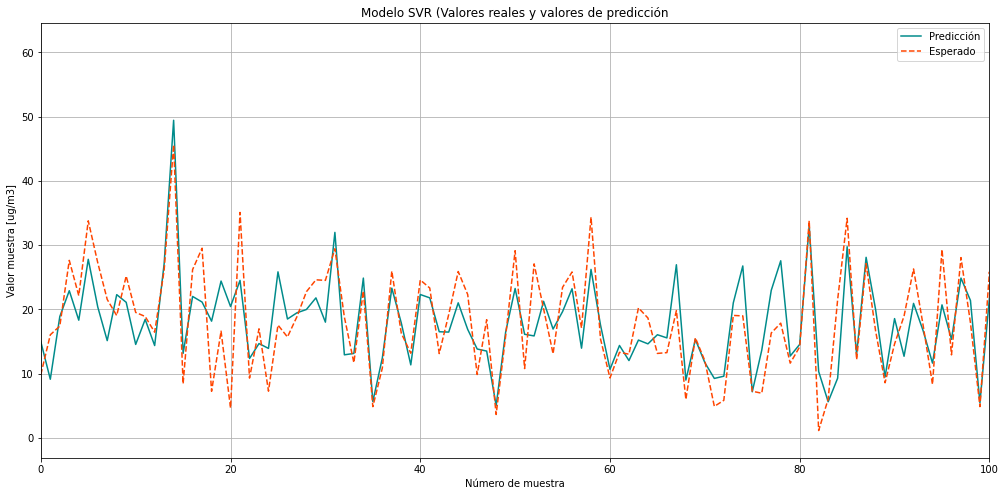

In [163]:
plt.figure(figsize=(17,8))
plt.plot(y_predict_SVR, color = 'darkcyan', label="Predicción")
plt.plot(y_test_SVR, '--', color = 'orangered', label="Esperado")
plt.xlim(0, 100)

plt.title("Modelo SVR (Valores reales y valores de predicción")
plt.xlabel("Número de muestra")
plt.ylabel("Valor muestra [ug/m3]")

plt.legend()
plt.grid()

**4. Red neuronal**

In [164]:
import keras 
import keras.backend as kb
import tensorflow as tf
from sklearn.model_selection import train_test_split
tf.random.set_seed(21)
np.random.seed(21)
X = data_x
y = data_y
X_train_DNN, X_test_DNN, y_train_DNN, y_test_DNN = train_test_split(X, y, test_size=0.2, shuffle=True)
X_train_DNN = np.array(X_train_DNN)
y_train_DNN = np.array(y_train_DNN)
X_test_DNN = np.array(X_test_DNN)
y_test_DNN = np.array(y_test_DNN)
model_DNN = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = X_train_DNN[0].shape),
    tf.keras.layers.Dense(3, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.relu)
])

optimizer=tf.keras.optimizers.Adam(0.01)
model_DNN.compile(loss='mean_squared_error',
              optimizer=optimizer,
              metrics=['mean_absolute_error'])

In [165]:
print(model_DNN.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 6)                 0         
                                                                 
 dense_8 (Dense)             (None, 3)                 21        
                                                                 
 dense_9 (Dense)             (None, 1)                 4         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________
None


In [166]:
history_DNN = model_DNN.fit(X_train_DNN, y_train_DNN, epochs = 25, validation_data=(X_test_DNN, y_test_DNN))

Epoch 1/25
106/106 [==============================] - 1s 6ms/step - loss: 44.8542 - mean_absolute_error: 5.0059 - val_loss: 38.3141 - val_mean_absolute_error: 4.6020
Epoch 2/25
106/106 [==============================] - 0s 4ms/step - loss: 39.4571 - mean_absolute_error: 4.6520 - val_loss: 35.8062 - val_mean_absolute_error: 4.5151
Epoch 3/25
106/106 [==============================] - 0s 3ms/step - loss: 37.2694 - mean_absolute_error: 4.5112 - val_loss: 33.3209 - val_mean_absolute_error: 4.3562
Epoch 4/25
106/106 [==============================] - 1s 7ms/step - loss: 36.0854 - mean_absolute_error: 4.4416 - val_loss: 32.8632 - val_mean_absolute_error: 4.3558
Epoch 5/25
106/106 [==============================] - 1s 5ms/step - loss: 35.5883 - mean_absolute_error: 4.3936 - val_loss: 31.7280 - val_mean_absolute_error: 4.2688
Epoch 6/25
106/106 [==============================] - 1s 9ms/step - loss: 35.6922 - mean_absolute_error: 4.4012 - val_loss: 31.3288 - val_mean_absolute_error: 4.2191
Epoc

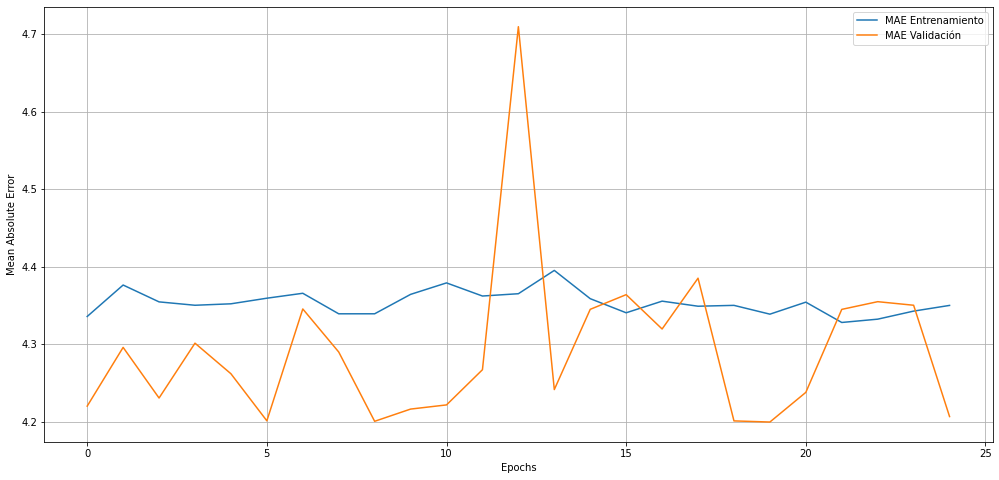

In [ ]:
plt.figure(figsize=(17,8))
plt.plot(history_DNN.history['mean_absolute_error'], label="MAE Entrenamiento")
plt.plot(history_DNN.history['val_mean_absolute_error'], label="MAE Validación")
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")

plt.legend()
plt.grid()